In [ ]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 from google.colab import files
upload = files.upload()

Saving Covid Dataset.csv to Covid Dataset (1).csv


In [ ]:
data = pd.read_csv("Covid Dataset.csv")
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

Informasi mengenai data:

Data ini merupakan data yang terdiri dari 21 kolom yang berisi:

GEJALA

1. Breathing problem (permasalahan pernapasan)
2. Fever (Demam)
3. Sore throat (Sakit tenggorokan)
4. Running nose (Pilek)
5. Asthma (Asma)
6. Chronic lung disease (penyakit paru-paru kronis)
7. Headache (Sakit kepala)
8. Heart disease (sakit jantung)
9. Diabetes
10. Hyper tension (Tekanan darah tinggi)
11. Fatigue (Kelelahan)
12. Gastrointestinal (gangguan organ pencernaan)

TRACK RECORD KONTAK DENGAN ORANG LAIN

13. Abroad Travel (bepergian ke luar negeri)
14. Contact with COVID Patient (kontak dengan pasien COVID)
15. Attended large meeting (menghadiri pertemuan kumpulan/segerombolan orang)
16. Visited Public Exposed Place (mengunjungi tempat umum)
17. Family working in public exposed place (keluarga bekerja di tempat umum)

LANGKAH PENCEGAHAN COVID

18. Wearing masks (menggunakan masker)
19. Sanitization from Market (Sanitasi dari pasar)

VARIABEL TARGET (APAKAH SESEORANG TERKENA COVID ATAU TIDAK)

20. COVID-19

# Preprocessing


In [ ]:
data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
#Mengubah Data yang masih kategorik menjadi numerik
# Yes = 1, No = 0
#Pertama-tama, data diubah dulu menjadi array agar dapat diubah dengan label encoder
data_array = data[['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19']].values

data_array[0:5]

array([['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
        'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
        'Yes'],
       ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
        'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
        'No', 'Yes'],
       ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
        'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
        'No', 'Yes'],
       ['Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
        'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
        'Yes'],
       ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
        'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
        'No', 'Yes']], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(['Yes','No'])

for i in range(0,21):
    data_array[:, i] = le.transform(data_array[:, i])

data_array[0:5]

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]],
      dtype=object)

In [ ]:
data_array.dtype

dtype('O')

In [ ]:
data_bersih = pd.DataFrame(data_array, columns = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'])

data_bersih.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
data_bersih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
#mengubah type dari object menjadi integer
data_bersih = data_bersih.infer_objects()
data_bersih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

Data sudah menjadi numerik dengan type integer

In [ ]:
data_bersih['COVID-19'].value_counts()

1    4383
0    1051
Name: COVID-19, dtype: int64

# Pemilihan atribut yang akan digunakan
Untuk memilih atribut mana yang akan digunakan dalam klasifikasi ini, akan dilihat besar korelasi dari tiap atribut terhadap "COVID-19"

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
data_corrmatrix= data_bersih.corr()
data_corrmatrix

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


berdasarkan correlation matrix tersebut dan berdasarkan penelusuran dari jurnal yang berkaitan dengan COVID-19, maka kami memutuskan bahwa atribut yang akan digunakan adalah sebagai berikut:

Breathing Problem, Fever, dry cough, headache, fatigue, sore throat,  Abroad travel, Contact with COVID Patient, Attended Large Gathering, Visited Public Exposed Places, Family working in Public Exposed Places

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


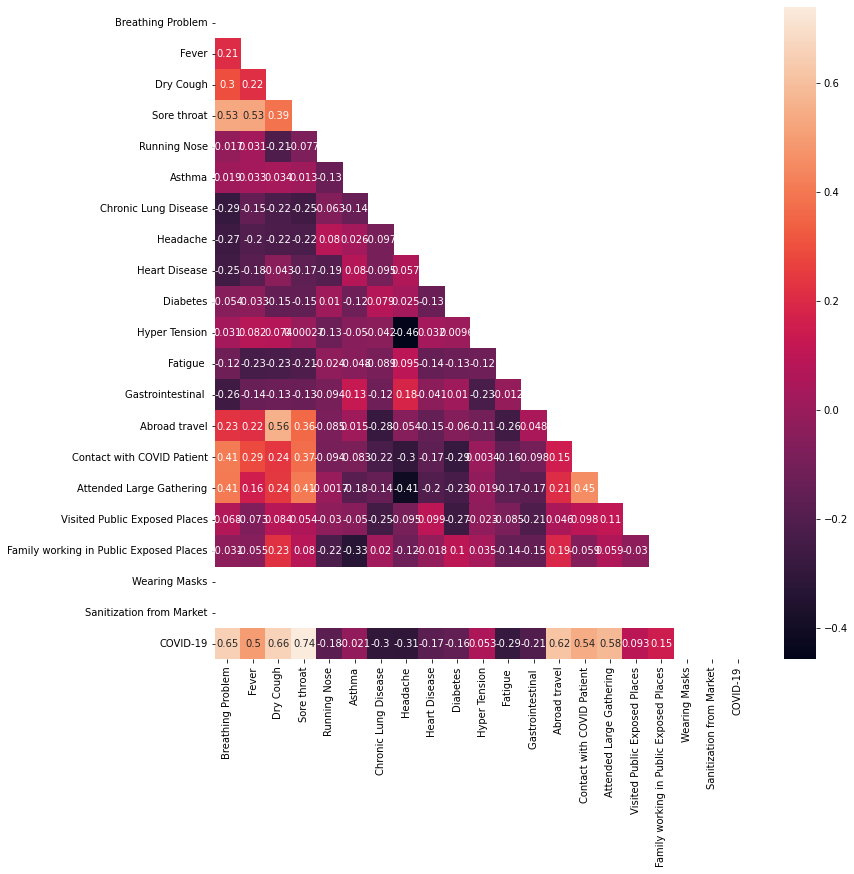

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# hanya memilih nilai korelasi di "upper triangle" -- menghindari duplikasi nilai
mask = np.triu(np.ones_like(data_corrmatrix.corr(), dtype=np.bool))

# buat heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data_corrmatrix.corr(), annot=True, mask=mask)

# Train/Test Split

In [ ]:
#set x dan set y
X = np.asanyarray(data_bersih[['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
                              'Headache', 'Fatigue ','Abroad travel',
                              'Contact with COVID Patient','Attended Large Gathering',
                              'Visited Public Exposed Places', 'Family working in Public Exposed Places']])
y = data['COVID-19']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
y_train_array = np.asarray(y_train)
y_train_array_reshape = y_train_array.reshape(-1,1)
y_train_encoded = oe.fit_transform(y_train_array_reshape)
print(y_train_encoded)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
y_test_array = np.asarray(y_test)
y_test_array_reshape = y_test_array.reshape(-1,1)
y_test_encoded = oe.fit_transform(y_test_array_reshape)
print(y_test_encoded)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [ ]:
np.unique(x_train, return_counts = True)

(array([0, 1]), array([20281, 27536]))

In [ ]:
np.unique(y_train_encoded, return_counts = True)

(array([0., 1.]), array([ 836, 3511]))

In [ ]:
np.unique(x_test, return_counts = True)

(array([0, 1]), array([5014, 6943]))

In [ ]:
np.unique(y_test_encoded, return_counts = True)

(array([0., 1.]), array([215, 872]))

In [ ]:
print(x_train.shape)
print(y_train.shape)

(4347, 11)
(4347,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(1087, 11)
(1087,)


# Decision Tree

## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugtree = DecisionTreeClassifier()

In [ ]:
drugtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = drugtree.predict(x_test)
y_pred_tree

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

## Visualisasi

In [ ]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [ ]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

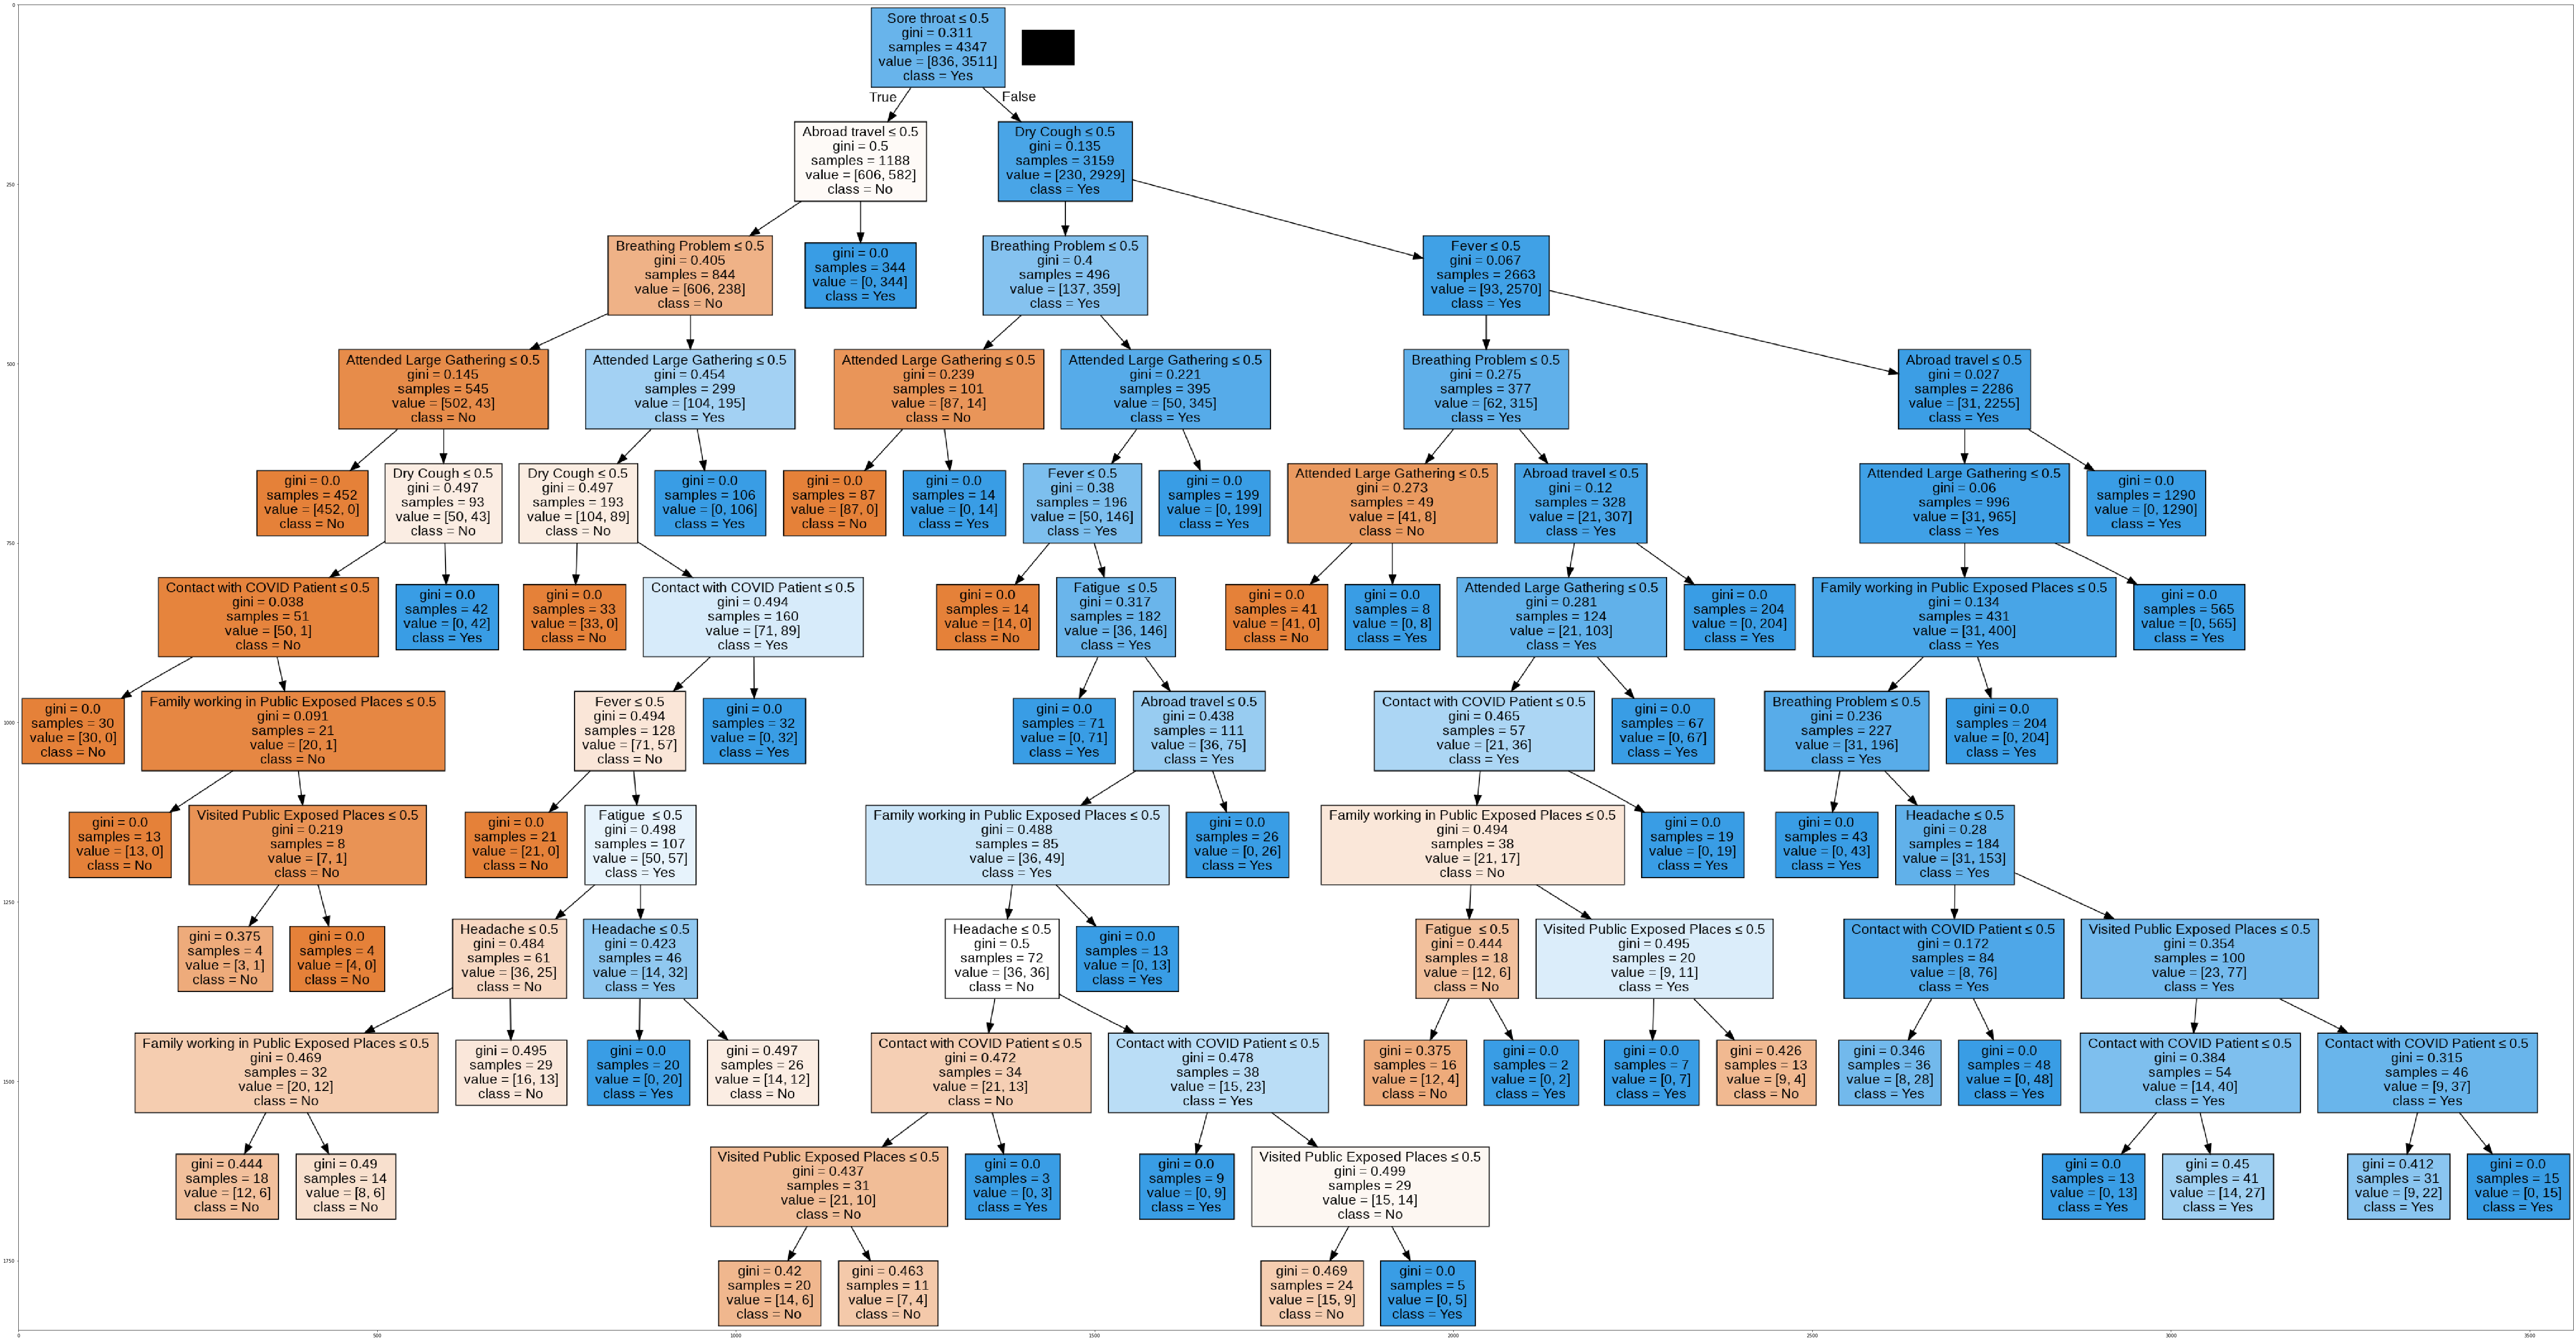

In [ ]:
dot_data = StringIO()
filename = 'drugtree.png'
featureNames = data_bersih.columns[[0,1,2,3,7,11,13,14,15,16,17]]
out = tree.export_graphviz(drugtree, feature_names = featureNames, out_file = dot_data,
                           class_names = np.unique(y_train), filled=True, special_characters = True, rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (100, 200))
plt.imshow(img, interpolation='nearest')

## Evaluasi Model

In [ ]:
#Evaluasi Model dengan Confusion Matrix

#fungsi untuk membuat confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()

        plt.ylabel('True label')

        plt.xlabel('Predicted label')

In [ ]:
#karena y_p sudah dalam bentuk array tapi masih kategorik, maka akan diubah menjadi array dengan entri numerik
y_pred_tree_reshape = y_pred_tree.reshape(-1,1)
y_pred_tree_encoded = oe.fit_transform(y_pred_tree_reshape)
print(y_pred_tree_encoded)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


Confusion matrix, without normalization
[[208   7]
 [  8 864]]


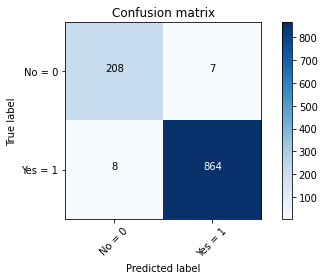

In [ ]:
#plotting confusion matrix untuk hasil klasifikasi Logistic Regression
cnf_tree = confusion_matrix(y_test_encoded, y_pred_tree_encoded, labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_tree, classes=['No = 0','Yes = 1'],normalize = False, title='Confusion matrix')

In [ ]:
#Evaluasi model dengan accuracy score dan classification report
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_tree))
print("Accuracy : ", accuracy_score(y_test, y_pred_tree))

              precision    recall  f1-score   support

          No       0.96      0.97      0.97       215
         Yes       0.99      0.99      0.99       872

    accuracy                           0.99      1087
   macro avg       0.98      0.98      0.98      1087
weighted avg       0.99      0.99      0.99      1087

Accuracy :  0.9862005519779209


# Support Vector Machine (SVM)

In [ ]:
x_train

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]])

In [ ]:
y_train_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
x_test

array([[0, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

In [ ]:
y_test_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

## Modelling

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train_encoded.ravel())

SVC()

In [ ]:
#Prediksi
y_pred_svm = clf.predict(x_test)
y_pred_svm

array([1., 1., 1., ..., 1., 0., 0.])

## Evaluasi

Confusion matrix, without normalization
[[204  11]
 [  7 865]]


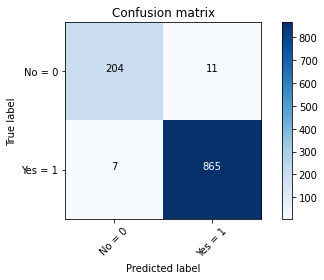

In [ ]:
#confusion matrix
cnf_matrix_svm = confusion_matrix(y_test_encoded, y_pred_svm, labels=[0,1])

np.set_printoptions(precision = 0)

plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=['No = 0', 'Yes = 1'],
                      normalize = False, title='Confusion matrix')

In [ ]:
print(classification_report(y_test_encoded, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       215
         1.0       0.99      0.99      0.99       872

    accuracy                           0.98      1087
   macro avg       0.98      0.97      0.97      1087
weighted avg       0.98      0.98      0.98      1087



# Logistic Regression

In [ ]:
x_train

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]])

In [ ]:
y_train_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
x_test

array([[0, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

In [ ]:
y_test_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

### Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.01, solver='liblinear').fit(x_train, y_train_encoded.ravel())
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
#prediksi
y_pred_logreg = LR.predict(x_test)
y_pred_logreg

array([1., 1., 1., ..., 1., 0., 1.])

### Evaluasi

Confusion matrix, without normalization
[[872   0]
 [ 99 116]]


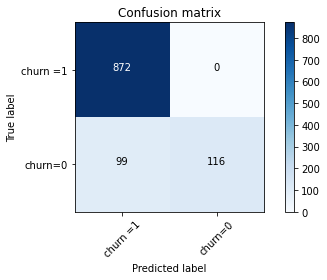

In [ ]:
cnf_logreg = confusion_matrix(y_test_encoded, y_pred_logreg, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_logreg, classes=['churn =1', 'churn=0'],normalize = False, title='Confusion matrix')

In [ ]:
print (classification_report(y_test_encoded, y_pred_logreg))

              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70       215
         1.0       0.90      1.00      0.95       872

    accuracy                           0.91      1087
   macro avg       0.95      0.77      0.82      1087
weighted avg       0.92      0.91      0.90      1087



# Komparasi Ketiga Metode Klasifikasi

In [ ]:
print(classification_report(y_test, y_pred_tree))
print("Accuracy : ", accuracy_score(y_test, y_pred_tree))

              precision    recall  f1-score   support

          No       0.96      0.97      0.97       215
         Yes       0.99      0.99      0.99       872

    accuracy                           0.99      1087
   macro avg       0.98      0.98      0.98      1087
weighted avg       0.99      0.99      0.99      1087

Accuracy :  0.9862005519779209


In [ ]:
print(classification_report(y_test_encoded, y_pred_svm))
print("Accuracy : ", accuracy_score(y_test_encoded, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       215
         1.0       0.99      0.99      0.99       872

    accuracy                           0.98      1087
   macro avg       0.98      0.97      0.97      1087
weighted avg       0.98      0.98      0.98      1087

Accuracy :  0.983440662373505


In [ ]:
print(classification_report(y_test_encoded, y_pred_logreg))
print("Accuracy : ", accuracy_score(y_test_encoded, y_pred_logreg))

              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70       215
         1.0       0.90      1.00      0.95       872

    accuracy                           0.91      1087
   macro avg       0.95      0.77      0.82      1087
weighted avg       0.92      0.91      0.90      1087

Accuracy :  0.9089236430542779


Berdasarkan hasil evaluasi ketiga metode, metode yang paling akurat adalah SVM